# Numpy

In [1]:
import numpy as np

lst = list(range(1000000))
arr = np.arange(1000000, dtype='i4')

####  Numpy is faster than Python list

In [2]:
%timeit sum(lst)

%timeit arr.sum()
%timeit np.sum(arr)
%timeit sum(arr)

7.68 ms ± 142 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
334 μs ± 39.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
288 μs ± 7.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<magic-timeit>:1: RuntimeWarning: overflow encountered in scalar add


63.7 ms ± 4.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Slicing
#### Numpy array is more memory efficient

In [3]:
arr = np.arange(24, dtype='i4')
arr2 = arr.reshape((3,8))
arr3 = arr[3::3]
arr[::-3]
np.info(arr), np.info(arr2), np.info(arr3)

class:  ndarray
shape:  (24,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x60cf272d9cf0
byteorder:  little
byteswap:  False
type: int32
class:  ndarray
shape:  (3, 8)
strides:  (32, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x60cf272d9cf0
byteorder:  little
byteswap:  False
type: int32
class:  ndarray
shape:  (7,)
strides:  (12,)
itemsize:  4
aligned:  True
contiguous:  False
fortran:  False
data pointer: 0x60cf272d9cfc
byteorder:  little
byteswap:  False
type: int32


(None, None, None)

###  Indexing

In [4]:
arr2
arr2[1]

arr3
arr3[[1,3,4]]

arr3 % 6 == 0
arr3[arr3 % 6 == 0]
arr3
arr3[arr3 % 6 == 0] = 0
arr3

array([ 3,  0,  9,  0, 15,  0, 21], dtype=int32)

# Pandas

In [2]:
import pandas as pd
import glob

### Numpy is a dependecy of Pandas

In [6]:
print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit                : 0691c5cf90477d3503834d983f69350f250a6ff7
python                : 3.12.1
python-bits           : 64
OS                    : Linux
OS-release            : 6.5.0-1025-azure
Version               : #26~22.04.1-Ubuntu SMP Thu Jul 11 22:33:04 UTC 2024
machine               : x86_64
processor             : x86_64
byteorder             : little
LC_ALL                : None
LANG                  : C.UTF-8
LOCALE                : C.UTF-8

pandas                : 2.2.3
numpy                 : 2.2.0
pytz                  : 2024.2
dateutil              : 2.9.0.post0
pip                   : 24.3.1
Cython                : None
sphinx                : None
IPython               : 8.30.0
adbc-driver-postgresql: None
adbc-driver-sqlite    : None
bs4                   : 4.12.3
blosc                 : None
bottleneck            : None
dataframe-api-compat  : None
fastparquet           : None
fsspec                : 2024.2.0
html5lib           

#### Find all csv files starting with 't20'

In [3]:
csv_files = glob.glob('t20*.csv')
dfs = []
for file in csv_files:
	df = pd.read_csv(file)
	df['date'] = pd.to_datetime(df['date'], format='%b %d, %Y')
	dfs.append(df)

### Multiple assignment / Unpacking
##### Store the dataframes

In [4]:
if dfs[0]["match_id"][0] == '202201':
	df2022, df2024 = dfs
else:
	df2024, df2022 = dfs

### Basic dataframe functions

In [5]:
df2022.head()
df2024.head()

df2022.info()
df2022.describe()

df2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9849 entries, 0 to 9848
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   match_id          9849 non-null   int64         
 1   season            9849 non-null   int64         
 2   phase             9849 non-null   object        
 3   match_no          9849 non-null   int64         
 4   date              9849 non-null   datetime64[ns]
 5   venue             9849 non-null   object        
 6   batting_team      9849 non-null   object        
 7   bowling_team      9849 non-null   object        
 8   innings           9849 non-null   int64         
 9   over              9849 non-null   float64       
 10  striker           9849 non-null   object        
 11  bowler            9849 non-null   object        
 12  runs_of_bat       9849 non-null   int64         
 13  extras            9849 non-null   int64         
 14  wide              9849 n

### Pandas Data types and reducing storage (converting to category)

In [6]:
df2022.dtypes

match_id                     int64
season                       int64
phase                       object
match_no                     int64
date                datetime64[ns]
venue                       object
batting_team                object
bowling_team                object
innings                      int64
over                       float64
striker                     object
bowler                      object
runs_of_bat                  int64
extras                       int64
wide                         int64
legbyes                      int64
byes                         int64
noballs                      int64
wicket_type                 object
player_dismissed            object
fielder                     object
dtype: object

In [7]:
(
	df2022
	.memory_usage(deep=True)
	.sum()
)

np.int64(5386004)

In [8]:
(
	df2022
	.select_dtypes(int)
	.describe()
)

,match_id,season,match_no,innings,runs_of_bat,extras,wide,legbyes,byes,noballs
count,9849.000000,9849.0,9849.000000,9849.000000,9849.000000,9849.000000,9849.000000,9849.000000,9849.000000,9849.000000
mean,202222.918875,2022.0,22.918875,1.476394,1.134024,0.070769,0.031272,0.016753,0.003249,0.004671
std,13.550445,0.0,13.550445,0.499468,1.485411,0.347860,0.174061,0.128351,0.056911,0.068185
min,202201.000000,2022.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202211.000000,2022.0,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202223.000000,2022.0,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,202235.000000,2022.0,35.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202245.000000,2022.0,45.000000,2.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
(
	df2022
	.venue
	.value_counts()
)

venue
Bellerive Oval, Hobart                 1993
Adelaide Oval, Adelaide                1654
Sydney Cricket Ground, Sydney          1649
Simonds Stadium, Geelong               1456
Perth Stadium, Perth                   1165
The Gabba, Brisbane                     982
Melbourne Cricket Ground, Melbourne     950
Name: count, dtype: int64

In [10]:
(
	df2022
	.astype({'venue':'category'})
	# .dtypes
	.memory_usage(deep=True)
	.sum()
)

np.int64(4674206)

### Chaining
#### Months during which the 2022 and 2024 world cups were played

In [11]:
(
	df2022['date']
	.dt
	# .month
	.strftime('%B')
	.unique()
	.tolist()
)

['October', 'November']

In [12]:
(
	df2024['date']
	.dt
	# .month
	.strftime('%B')
	.unique()
	.tolist()
)

['June']

### loc and iloc

In [13]:
(
	df2024
	.set_index('date')
	# .loc['2024-06-01 00:00:00']
	# .iloc[0:20:,]
)

,match_id,season,phase,match_no,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
date,,,,,,,,,,,,,,,,,,,,
2024-06-01,202401,2024,Group A,1,"Grand Prairie Stadium, Dallas",CAN,USA,1,0.1,Aaron Johnson,Ali Khan,4,0,0,0,0.0,0,NaN,NaN,NaN
2024-06-01,202401,2024,Group A,1,"Grand Prairie Stadium, Dallas",CAN,USA,1,0.2,Aaron Johnson,Ali Khan,0,0,0,0,0.0,0,NaN,NaN,NaN
2024-06-01,202401,2024,Group A,1,"Grand Prairie Stadium, Dallas",CAN,USA,1,0.3,Aaron Johnson,Ali Khan,0,1,0,1,0.0,0,NaN,NaN,NaN
2024-06-01,202401,2024,Group A,1,"Grand Prairie Stadium, Dallas",CAN,USA,1,0.4,Navneet Dhaliwal,Ali Khan,0,0,0,0,0.0,0,NaN,NaN,NaN
2024-06-01,202401,2024,Group A,1,"Grand Prairie Stadium, Dallas",CAN,USA,1,0.5,Navneet Dhaliwal,Ali Khan,0,0,0,0,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29,202455,2024,Final,55,"Kensington Oval, Bridgetown, Barbados",RSA,IND,2,19.3,Rabada,Hardik Pandya,0,1,0,0,1.0,0,NaN,NaN,NaN
2024-06-29,202455,2024,Final,55,"Kensington Oval, Bridgetown, Barbados",RSA,IND,2,19.4,Maharaj,Hardik Pandya,0,1,0,1,0.0,0,NaN,NaN,NaN
2024-06-29,202455,2024,Final,55,"Kensington Oval, Bridgetown, Barbados",RSA,IND,2,19.5,Rabada,Hardik Pandya,0,1,1,0,0.0,0,NaN,NaN,NaN


### Filtering using loc or query

In [14]:
cols_to_keep = [col for col in df.columns if col != 'match_id']

(
	df2024
	.loc[(df2024['phase']== 'Group B')& (df2024['striker'].str.contains('warner', case=False)),cols_to_keep]
)

,season,phase,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
1891,2024,Group B,10,2024-06-05,"Kensington Oval, Bridgetown, Barbados",AUS,OMAN,1,0.1,Warner,Bilal Khan,1,0,0,0,0.0,0,NaN,NaN,NaN
1896,2024,Group B,10,2024-06-05,"Kensington Oval, Bridgetown, Barbados",AUS,OMAN,1,0.6,Warner,Bilal Khan,0,0,0,0,0.0,0,NaN,NaN,NaN
1898,2024,Group B,10,2024-06-05,"Kensington Oval, Bridgetown, Barbados",AUS,OMAN,1,1.2,Warner,Kaleemullah,4,0,0,0,0.0,0,NaN,NaN,NaN
1899,2024,Group B,10,2024-06-05,"Kensington Oval, Bridgetown, Barbados",AUS,OMAN,1,1.3,Warner,Kaleemullah,0,0,0,0,0.0,0,NaN,NaN,NaN
1900,2024,Group B,10,2024-06-05,"Kensington Oval, Bridgetown, Barbados",AUS,OMAN,1,1.4,Warner,Kaleemullah,0,1,0,1,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,2024,Group B,24,2024-06-11,"Sir Vivian Richards Stadium, North Sound, Antigua",AUS,NAM,2,1.4,Warner,Wiese,0,0,0,0,0.0,0,caught,Warner,Trumpelmann
6832,2024,Group B,35,2024-06-15,"Daren Sammy National Cricket Stadium, Gros Isl...",AUS,SCO,2,0.4,Warner,Leask,0,0,0,0,0.0,0,NaN,NaN,NaN
6833,2024,Group B,35,2024-06-15,"Daren Sammy National Cricket Stadium, Gros Isl...",AUS,SCO,2,0.5,Warner,Leask,1,0,0,0,0.0,0,NaN,NaN,NaN
6835,2024,Group B,35,2024-06-15,"Daren Sammy National Cricket Stadium, Gros Isl...",AUS,SCO,2,1.1,Warner,Wheal,0,0,0,0,0.0,0,NaN,NaN,NaN


In [15]:
(
	df2024
	.query("striker.str.contains('warner', case=False) and phase == 'Group B'")[cols_to_keep]
)

,season,phase,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
1891,2024,Group B,10,2024-06-05,"Kensington Oval, Bridgetown, Barbados",AUS,OMAN,1,0.1,Warner,Bilal Khan,1,0,0,0,0.0,0,NaN,NaN,NaN
1896,2024,Group B,10,2024-06-05,"Kensington Oval, Bridgetown, Barbados",AUS,OMAN,1,0.6,Warner,Bilal Khan,0,0,0,0,0.0,0,NaN,NaN,NaN
1898,2024,Group B,10,2024-06-05,"Kensington Oval, Bridgetown, Barbados",AUS,OMAN,1,1.2,Warner,Kaleemullah,4,0,0,0,0.0,0,NaN,NaN,NaN
1899,2024,Group B,10,2024-06-05,"Kensington Oval, Bridgetown, Barbados",AUS,OMAN,1,1.3,Warner,Kaleemullah,0,0,0,0,0.0,0,NaN,NaN,NaN
1900,2024,Group B,10,2024-06-05,"Kensington Oval, Bridgetown, Barbados",AUS,OMAN,1,1.4,Warner,Kaleemullah,0,1,0,1,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,2024,Group B,24,2024-06-11,"Sir Vivian Richards Stadium, North Sound, Antigua",AUS,NAM,2,1.4,Warner,Wiese,0,0,0,0,0.0,0,caught,Warner,Trumpelmann
6832,2024,Group B,35,2024-06-15,"Daren Sammy National Cricket Stadium, Gros Isl...",AUS,SCO,2,0.4,Warner,Leask,0,0,0,0,0.0,0,NaN,NaN,NaN
6833,2024,Group B,35,2024-06-15,"Daren Sammy National Cricket Stadium, Gros Isl...",AUS,SCO,2,0.5,Warner,Leask,1,0,0,0,0.0,0,NaN,NaN,NaN
6835,2024,Group B,35,2024-06-15,"Daren Sammy National Cricket Stadium, Gros Isl...",AUS,SCO,2,1.1,Warner,Wheal,0,0,0,0,0.0,0,NaN,NaN,NaN


### Simple group by, pivot and unstack

In [16]:
(
	df2024
	.groupby(['match_id','innings'])['runs_of_bat']
	.agg('sum')
	# .unstack()
)

match_id  innings
202401    1          184
          2          178
202402    1          127
          2          135
202403    1          104
                    ... 
202453    2          114
202454    1          168
          2          101
202455    1          169
          2          160
Name: runs_of_bat, Length: 107, dtype: int64

In [17]:
(
	df2024
	.pivot_table(columns=['match_id','innings'], values='runs_of_bat', aggfunc='sum')
)

match_id    202401      202402      202403              202404      ...  \
innings          1    2      1    2      1    2   3   4      1   2  ...   
runs_of_bat    184  178    127  135    104  100  21  10     71  74  ...   

match_id    202451      202452     202453      202454      202455       
innings          1    2      1   2      1    2      1    2      1    2  
runs_of_bat    202  172    102  94     86  114    168  101    169  160  

[1 rows x 107 columns]

### Sorting

In [18]:
(
	df2024
	.groupby(['batting_team'])['runs_of_bat']
	.agg('sum')
	.sort_values(ascending=False)
)

batting_team
IND     1201
RSA     1115
WI      1056
AUS      981
AFG      965
ENG      856
USA      840
BAN      819
SCO      544
PAK      467
NED      443
OMAN     417
CAN      409
NAM      409
SL       384
PNG      328
NZ       307
IRE      293
NEP      276
UGA      178
Name: runs_of_bat, dtype: int64

In [19]:
(
	df2024
	.pivot_table(columns=['batting_team'], values='runs_of_bat', aggfunc='sum')
	.transpose()
	.sort_values(by='runs_of_bat',ascending=False)
)

,runs_of_bat
batting_team,
IND,1201
RSA,1115
WI,1056
AUS,981
AFG,965
ENG,856
USA,840
BAN,819
SCO,544


### Joining 2 dataframes

In [20]:
team_runs_2022 = (
	df2022
	.groupby(['batting_team'])['runs_of_bat']
	.agg('sum')
	.sort_values(ascending=False)
	.reset_index()
)

team_runs_2024 = (
	df2024
	.groupby(['batting_team'])['runs_of_bat']
	.agg('sum')
	.sort_values(ascending=False)
	.reset_index()
)

In [21]:
(
	team_runs_2022
	.merge(team_runs_2024,
		how='outer',
		on='batting_team',
		suffixes=('_2022', '_2024')
		)
	.fillna(0) 					
)

,batting_team,runs_of_bat_2022,runs_of_bat_2024
0,AFG,399.0,965.0
1,AUS,577.0,981.0
2,BAN,629.0,819.0
3,CAN,0.0,409.0
4,ENG,798.0,856.0
5,IND,966.0,1201.0
6,IRE,990.0,293.0
7,NAM,398.0,409.0
8,NED,957.0,443.0
9,NEP,0.0,276.0


### Group by, Assign, Lambda function, Rename, Concat, Axis, Pipe, Series, Dataframe, Map
#### Function to process a DataFrame

In [22]:
def process_df(df):
    return (
        df.rename(columns={'over': 'Over Ball'})
        .assign(over=lambda x: x['Over Ball'].apply(lambda y: int(str(y).split('.')[0])+1),
                ball=lambda x: x['Over Ball'].apply(lambda y: int(str(y).split('.')[1])))
        .groupby(['match_id','over'])[['runs_of_bat', 'extras']]
        # .agg(['sum', 'mean'])
		.agg('sum')
		.reset_index()
		.groupby(['over'])[['runs_of_bat', 'extras','extras']].agg({
		   'runs_of_bat': ['mean'],
    		'extras': ['mean', 'sum']
		})
    ).map(lambda x: round(x) if isinstance(x, float) else x)

#### Process both DataFrames

In [23]:
result_2022 = process_df(df2022)
result_2024 = process_df(df2024)

####  Merge results for comparison

In [25]:
comparison_result = pd.concat([result_2022.add_suffix('_2022'), result_2024.add_suffix('_2024')], axis=1)

### loc and iloc

In [26]:
(
	comparison_result
	.reset_index()
	.set_index(('extras_2022', 'sum_2022'))
	.iloc[0:5:,[0,1]]
	# .iloc[0:5:,0] # Dataframe
	# .iloc[0:5:,[0]]. # Series
	# .pipe(lambda x: (print(f"Type: {type(x)}"), x)[1]) #prints type
	# .columns
)

,over,runs_of_bat_2022
,,mean_2022
"(extras_2022, sum_2022)",,
41,1,10
52,2,13
32,3,13
37,4,15
37,5,14


In [27]:
(
	comparison_result
	.reset_index()
	.set_index(('extras_2022', 'sum_2022'))
	# .loc[0:6:,[('over',''),('runs_of_bat_2024', 'mean_2024')]]
	.loc[[41,52,32,37],[('over',''),('runs_of_bat_2024', 'mean_2024')]]
	# .loc[[41,52,32,37],:]
	# .pipe(lambda x: (print(f"Type: {type(x)}"), x)[1]) #prints type
)

,over,runs_of_bat_2024
,,mean_2024
"(extras_2022, sum_2022)",,
41,1,10
52,2,12
32,3,13
37,4,14
37,5,14


### Correlation

In [28]:
correlation_matrix = (
    df2024.select_dtypes(include=['number'])
        .corr(method='spearman')
)

### Heatmaps

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

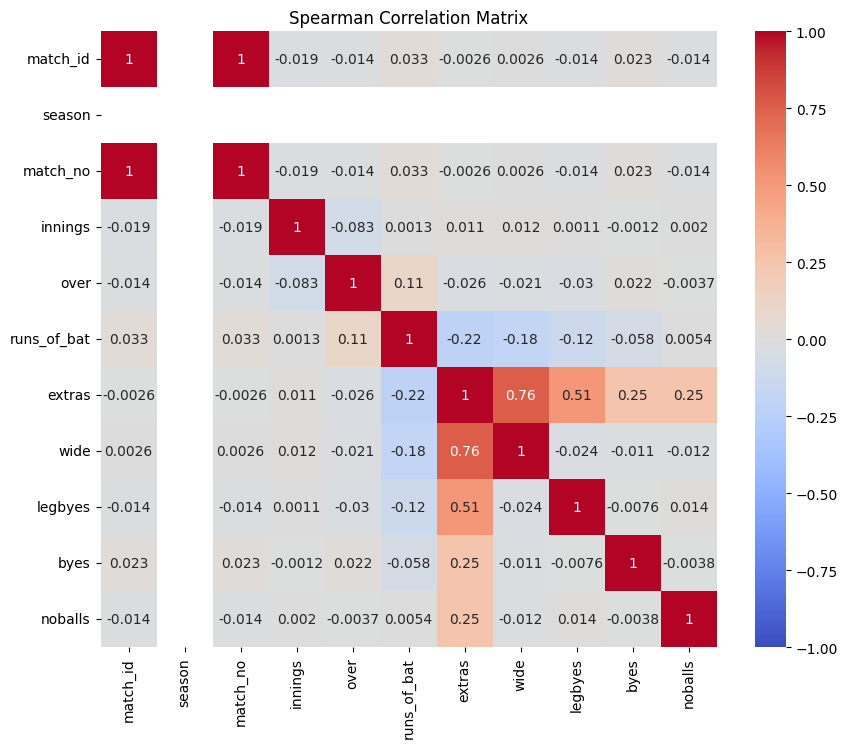

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            square=True,
            vmin=-1, vmax=1)

plt.title('Spearman Correlation Matrix')
plt.show()

### Conditional formatting styling

In [31]:
team_runs_2022 = (
	df2022
	.groupby(['batting_team'])['runs_of_bat']
	.agg('sum')
	.sort_values(ascending=False)
	.reset_index()
)

team_runs_2024 = (
	df2024
	.groupby(['batting_team'])['runs_of_bat']
	.agg('sum')
	.sort_values(ascending=False)
	.reset_index()
)

#### Formatting when comparing cell values with a scalar.

In [32]:
(
	team_runs_2022
	.merge(team_runs_2024,
		how='outer',
		on='batting_team',
		suffixes=('_2022', '_2024')
		)
	.fillna(0)
	.style
	.map(
		lambda x: 'background-color: yellow' if x < 800 else 'background-color: green',
        subset=['runs_of_bat_2022']
	)
	.map(
		lambda x: 'background-color: yellow' if x < 800 else 'background-color: green',
        subset=['runs_of_bat_2024']
	)
)

,batting_team,runs_of_bat_2022,runs_of_bat_2024
0,AFG,399.000000,965.000000
1,AUS,577.000000,981.000000
2,BAN,629.000000,819.000000
3,CAN,0.000000,409.000000
4,ENG,798.000000,856.000000
5,IND,966.000000,1201.000000
6,IRE,990.000000,293.000000
7,NAM,398.000000,409.000000
8,NED,957.000000,443.000000
9,NEP,0.000000,276.000000


#### Formatting when comparing two columns

In [35]:
merged_total_runs_compare = (
	team_runs_2022
	.merge(team_runs_2024,
		how='outer',
		on='batting_team',
		suffixes=('_2022', '_2024')
		)
	.fillna(0)
)

(
    merged_total_runs_compare.style.apply(
        lambda row: ['background-color: green'] * len(row) if row['runs_of_bat_2022'] < row['runs_of_bat_2024'] else ['background-color: yellow'] * len(row),
        axis=1
    )
)

,batting_team,runs_of_bat_2022,runs_of_bat_2024
0,AFG,399.000000,965.000000
1,AUS,577.000000,981.000000
2,BAN,629.000000,819.000000
3,CAN,0.000000,409.000000
4,ENG,798.000000,856.000000
5,IND,966.000000,1201.000000
6,IRE,990.000000,293.000000
7,NAM,398.000000,409.000000
8,NED,957.000000,443.000000
9,NEP,0.000000,276.000000


### TODO Connecting a database with Pandas

## Pandas 2.0

In [36]:
# !pip install pyarrow
# !pip install --upgrade pyarrow
# !pip show pyarrow

In [37]:
import pandas as pd
import glob

In [38]:
csv_files_2 = glob.glob('t20*.csv')
dfs_2 = []
for file in csv_files_2:
	df_2 = pd.read_csv(file, dtype_backend='pyarrow')
	df_2['date'] = pd.to_datetime(df_2['date'], format='%b %d, %Y')
	dfs_2.append(df_2)

# Store the dataframes
if dfs_2[0]["match_id"][0] == '202201':
	df2022_, df2024_2 = dfs_2
else:
	df2024_2, df2022_2 = dfs_2

In [39]:
(
	df2022_2
	.memory_usage(deep=True)
	.sum()
)

np.int64(1877161)

In [40]:
df2022_2.dtypes

match_id             int64[pyarrow]
season               int64[pyarrow]
phase               string[pyarrow]
match_no             int64[pyarrow]
date                 datetime64[ns]
venue               string[pyarrow]
batting_team        string[pyarrow]
bowling_team        string[pyarrow]
innings              int64[pyarrow]
over                double[pyarrow]
striker             string[pyarrow]
bowler              string[pyarrow]
runs_of_bat          int64[pyarrow]
extras               int64[pyarrow]
wide                 int64[pyarrow]
legbyes              int64[pyarrow]
byes                 int64[pyarrow]
noballs              int64[pyarrow]
wicket_type         string[pyarrow]
player_dismissed    string[pyarrow]
fielder             string[pyarrow]
dtype: object

# Matplotlib
#### Cumulative totals

In [42]:
import matplotlib.pyplot as plt

In [41]:
cum_totals_2024_2 = (
	df2024_2[(df2024_2['match_id']==df2024_2['match_id'].max()) & (df2024_2['innings']==2)]
	.rename(columns={'over': 'Over Ball'})
	.assign(over=lambda x: x['Over Ball'].apply(lambda y: int(str(y).split('.')[0])+1),
                ball=lambda x: x['Over Ball'].apply(lambda y: int(str(y).split('.')[1])))
	.assign(total_runs=lambda x: x['runs_of_bat']+x['extras'])			
	.pivot_table(values='total_runs', columns='over',aggfunc='sum')
	.transpose()
	.sort_values(by='over')['total_runs']
	.cumsum()
	.reset_index()
)

#### Create line plot using Matplotlib

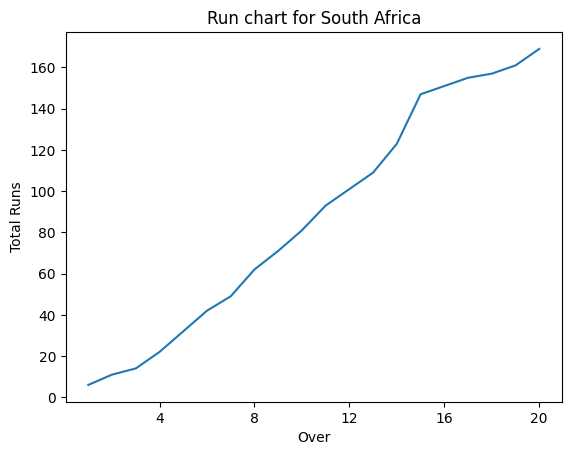

In [44]:
plt.plot(cum_totals_2024_2['over'], cum_totals_2024_2['total_runs'])

# Add labels and title for clarity
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.title('Run chart for South Africa')

custom_ticks = [4] 
custom_ticks=[i for i in range(1,len(cum_totals_2024_2)+1) if i %4 ==0]

plt.xticks(custom_ticks)

# Display the plot
plt.show()